# $\sigma$ and $\sigma ^+$ Plots

this notebook contains plots with the same rates agains both value sets for $\sigma$ that may apply. 

# Data Sets from the Literature

The following data sets were obtained from the literature.

## Solvolysis of diphenyl methylene chloride in water/solvent mixture

data4.csv

### Data Sources

Data for the solvolysis of benzhydrylchloride in methanol and isopropanol were obtained from..

"The Effect of Substitution on the Solvolysis Rates of Benzhydryl Chlorides." S. Altscher, R. Baltzly, S.W. Blackman, *J. Am. Chem. Soc*., **1952**, *74*, 3649-3652 https://doi.org/10.1021/ja01134a054

EtOH results from...

"The Reactivity of Atoms and Groups in Organic Compounds. IV. Second Contribution on the Carbon-Chlorine Bond: The Rates of the Reactions of Certain Derivatives of Diphenylchloromethane with Ethyl Alcohol and with Isopropyl Alcohol." J.F. Norris, C. Banta, *J. Am. Chem. Soc.*, **1928**, *50*, 1804-1808 https://doi.org/10.1021/ja01393a049

More EtOH results (Marked with \*) from...

"The Reactivity of Atoms and Groups in Organic Compounds. V. Third Contribution on the Carbon-Chlorine Bond: The Rates of the Reactions of Certain Derivatives of Diphenylchloromethane with Ethyl Alcohol." J.F. Norris, J.T. Blake, *J. Am. Chem. Soc.*, **1928**, *50*, 1808-1812 https://doi.org/10.1021/ja01393a050

### Data File Description

There can be up to three substituents in the series of compounds used. Substituents are listed in three columns, Sub1, Sub2 and Sub3. 

Rates of hydrolysis are reported for substituted benzyl chlorides in the following conditions.

1. Methanol
2. isopropanol
3. Ethanol

The "Extra" column denotes the numbers from the 1928 data set for ethanol.

All temperatures were 25 deg
**Note:** 
- No acid or base added.  
- Rate constants are first-order rate of in [BzCl] and reported in /$10^{-3} min^{-1}$.

### Cleaning Data Set

the code below will extract and clean the data from the database for use in  this analysis.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_14/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

sigmatype = "s_plus"          # sigmatype can be one of ["sigma", "s_plus", "s_minus"]

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

#Data_Set = "Table_6_Data_NoOrtho.csv"
Data_Set = "Table_6_Data.csv"

Filename = github_location + Data_Set

df1 = pd.read_csv(Filename,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

df1.insert(3, "Total_Sigma", np.NaN, allow_duplicates = False)    # Insert a column for the total sigma value

display(df1)

,Sub1,Sub2,Sub3,Total_Sigma,k_MeOH,k_iPrOH,k_EtOH,Extra
Substituent,,,,,,,,
H,H,H,H,NaN,48.900,0.343,2.6600,NaN
o-Cl,o-Cl,H,H,NaN,0.615,NaN,0.0254,NaN
m-Cl,m-Cl,H,H,NaN,1.270,NaN,0.0590,*
p-Cl,p-Cl,H,H,NaN,22.800,0.175,1.0700,NaN
p-CH3,p-CH3,H,H,NaN,NaN,NaN,43.3000,NaN
m-OEt,m-OEt,H,H,NaN,NaN,0.396,NaN,NaN
p-OCH3,p-OCH3,H,H,NaN,NaN,1700.000,NaN,NaN
p-NO2,p-NO2,H,H,NaN,0.033,NaN,NaN,NaN
"3,4-Cl2",m-Cl,p-Cl,H,NaN,0.902,NaN,NaN,NaN


## Hammett Parameters from A. Williams
This table presents the Hammett $\sigma$ LFER values collected values presented in the collection curated by A. Williams in his book, “Free Energy Relationships in Organic and Bio-organic Chemistry”, *The Royal Society of Chemistry, Cambridge*, **2003**, pp 258-277. https://doi.org/10.1039/9781847550927.

 The data series are as follows:
 
- **Substituent**
     - The code of the substituent and the **index series**. Hopefully we will use a unique code for each substituent that will apply across all these data tables. Students should use data cleaning methods to track down duplicate data and mismatched codes.
- **sigma**
    - The Hammett $\sigma$ value
- **s_plus**
    - The Brown-Okamoto $\sigma_p^+$ value
- **s_minus**
    - The Brown-Okamoto $\sigma_p^-$ value
- **Page**
    - The page number in book. This is included to enable faster checking of the data by other students (all errors are intentional - to see if they are paying attention.)
    
**Note:** You may also use the Hansch data set available from the GitHub page.

### Cleaning Data Set

the code below will extract and clean the data from the database for use in  this analysis.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


#################################################################
### a function to fill in sigma for empty spaces in s+ and s- ###
#################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

df2 = pd.read_csv(github_location_LFER_tables + "LFER_HanschLeoTaft.csv", 
#df2 = pd.read_csv(github_location_LFER_tables + "LFER_Williams.csv",
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 
#display(df2)

########################################################
### Fill across sigma values and select substituents ###
########################################################

df2=fill_sigma(df2)
#display(df2)

###############################
### Remove unneeded columns ###
###############################
 
df2.drop(labels = ["TABLE V", "TABLE I"],axis = 1, inplace = True)    #Trim "LFER_HanschLeoTaft.csv" data
#df2.drop(labels = ["Page"], axis = 1, inplace = True) #Trim "LFER_Williams.csv"" data
 
#df2.sort_values(by=['sigma'], inplace=True)
display(df2)

,sigma,s_plus,s_minus
Substituent,,,
m-Br,0.39,0.39,0.39
p-Br,0.23,0.15,0.25
m-C6H5,0.06,0.06,0.06
p-C6H5,-0.01,0.02,-0.18
m-CCCH3,0.21,0.21,0.21
m-CCH,0.21,0.21,0.21
p-CCH,0.23,0.18,0.53
p-CCCH3,0.03,-0.26,-0.13
m-CF3,0.43,0.43,0.43


## Calculate Total $\sigma$ Values

There are three potential substituents in each molecule in the series. Hammett substituent constants are generally additive (within reason) so we can sum the three $\sigma$ values to create a $\sum\sigma$ value that represent the combined electronic effect of the substituents in diphenylmethylenechloride.

The code below accesses the value of $\sigma$ for each substituent and sums them up to a toyal.  This total is then entered into the dataframe. If one or more of the substituents have no asigned $\sigma$ value (e.g. *ortho*-substituents) then the total is recorded as 'NaN'

In [14]:
####################################################################
### Function to total the sigma values of multiple substituents  ###
####################################################################

def Total_sigma(row, sigmatype, df1, df2):     # inputs the index ("row") and the dataframes for rates (df1) 
                                               # and for sigma values (df2. 
                                               # sigmatype can be one of ["sigma", "s_plus", "s_minus"]
    total = 0.
    for sub in ["Sub1","Sub2","Sub3"]:   # Change this list to match the columns in the data set
        a = (df1[sub][row])

        if a in df2.index:               # If the index does not have a Hammett sigma value return 'NaN'
            sigma = df2[sigmatype][a]
            total = total + float(sigma)
        else:
            total = np.NaN

    return(total)

######################################################################
### calculate combined sigma value for all molecules in dataframe  ###
######################################################################


for molecule in df1.index:

    total = Total_sigma(molecule,sigmatype,df1,df2)
    df1.loc[molecule,"Total_Sigma"] = total

display(df1)

,Sub1,Sub2,Sub3,Total_Sigma,k_MeOH,k_iPrOH,k_EtOH,Extra
Substituent,,,,,,,,
H,H,H,H,0.00,48.900,0.343,2.6600,NaN
o-Cl,o-Cl,H,H,NaN,0.615,NaN,0.0254,NaN
m-Cl,m-Cl,H,H,0.37,1.270,NaN,0.0590,*
p-Cl,p-Cl,H,H,0.11,22.800,0.175,1.0700,NaN
p-CH3,p-CH3,H,H,-0.31,NaN,NaN,43.3000,NaN
m-OEt,m-OEt,H,H,0.10,NaN,0.396,NaN,NaN
p-OCH3,p-OCH3,H,H,-0.78,NaN,1700.000,NaN,NaN
p-NO2,p-NO2,H,H,0.79,0.033,NaN,NaN,NaN
"3,4-Cl2",m-Cl,p-Cl,H,0.48,0.902,NaN,NaN,NaN


## Calculations

The rates are reported in units of $10^{-3} min^{-1}$.  They will be converted to $min^{-1}$ by multiplying the values by $10^{-3}$. Then the log values will be calculated for the log-log Hammett plots.

See the code below.

In [15]:
df1["k_MeOH"] = df1["k_MeOH"]*(10**(-3))
df1["k_iPrOH"] = df1["k_iPrOH"]*(10**(-3))
df1["k_EtOH"] = df1["k_EtOH"]*(10**(-3))

df1["log_k_MeOH"] = np.log10(df1["k_MeOH"])
df1["log_k_iPrOH"] = np.log10(df1["k_iPrOH"])
df1["log_k_EtOH"] = np.log10(df1["k_EtOH"])

#display(df1)


## Plot Results

Set up the plot and layer on the x,y results of each experiment.  Use the 'True' and 'False' flags to activate or ignore plot components. Rows with empty data are deleted in each x,y data set before calculating the line fits.

EtOH closed circles 
slope = -4.313 +/- 0.148
intercept = -2.508 +/- 0.046
rsq = 0.989
p = 3.24e-10

iPrOH open cirles
slope = -4.497 +/- 0.238
intercept = -3.225 +/- 0.083
rsq = 0.984
p = 1.4e-06

MeOH open squares
slope = -4.009 +/- 0.181
intercept = -1.280 +/- 0.076
rsq = 0.992
p = 2.46e-05



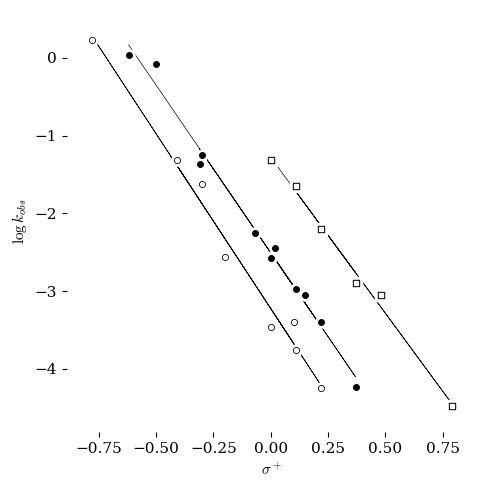

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

##################################################
### Function to report values from a line fit  ###
##################################################

def Report(comment, result):
    
    print(comment)
    print(f"slope = {result.slope:-.3f} +/- {result.stderr:.3f}")
    print(f"intercept = {result.intercept:-.3f} +/- {result.intercept_stderr:.3f}")
    print(f"rsq = {(result.rvalue)**2:-.3}")
    print(f"p = {(result.pvalue):-.3}")
    print("")


###################################
### Set up plot style and size  ###
###################################

plt.style.use(github_location_styles + "tufte.mplstyle")        
#plt.style.use(github_location_styles + "S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))  
ax.margins(x=.07, y=.07, tight=True)

####################################
### Set up plot axes and labels  ###
####################################

if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

ax.set(
#    title="Initial Rate Log-Log Plot",       
          ylabel=r"$\log{k_{obs}}$", 
          xlabel=x_label,                
#          xlim=[-.9,.5],                  
#          ylim=[-5,1]
         )


######################################################################
### In the following blocks of code, each plot is made and placed  ###
### in the plot. Change from 'False' to 'True' to activate a block ###
## of code and place that given plot.                              ###
######################################################################

##############################
if True:
    series = "log_k_EtOH"                      # Choose a data series from the rate dataframe

    df3 = df1[["Total_Sigma", series]].copy()  # copy out the two data series needed into a new dataframe
    df3.dropna(axis=0, inplace=True)
#    display(df3)
    
    x = df3["Total_Sigma"]
    y = df3[series]
    
    linfit = linregress(x,y)
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)
    ax.scatter(x,y, s=64, color="white", marker='o', zorder=3)
    ax.scatter(x,y, s=16, color="black", marker='o', zorder=3)

    ############################
    ### Print labels on plot ###
    ############################

    if False:      # Change to True to add annotations to the plot 
        names = list(df3.index)
        for name,x1,y1 in zip(names,x,y):
            plt.annotate(name,             # this is the text
                        (x1,y1),          # these are the coordinates to position the label
                        textcoords="offset points", # how to position the text
                        xytext=(0,-20),  # distance from text to points (x,y)
                        ha='left')      # horizontal alignment can be left, right or center

    
    Report("EtOH closed circles ", linfit)

##############################
if True:
    series = "log_k_iPrOH"

    df3 = df1[["Total_Sigma", series]].copy()
    df3.dropna(axis=0, inplace=True)
#    display(df3)

    x = df3["Total_Sigma"]
    y = df3[series]

    linfit = linregress(x,y)
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)
    ax.scatter(x,y, s=64, color="white", marker='o', zorder=3)
    ax.scatter(x,y, s=16, color="black", marker='o', zorder=3)
    ax.scatter(x,y, s=8, color="white", marker='o', zorder=3)

    ############################
    ### Print labels on plot ###
    ############################

    if False:      # Change to True to add annotations to the plot 
        names = list(df3.index)
        for name,x1,y1 in zip(names,x,y):
            plt.annotate(name,             # this is the text
                        (x1,y1),          # these are the coordinates to position the label
                        textcoords="offset points", # how to position the text
                        xytext=(0,-20),  # distance from text to points (x,y)
                        ha='left')      # horizontal alignment can be left, right or center

    Report("iPrOH open cirles", linfit)

##############################
if True:
    series = "log_k_MeOH"

    df3 = df1[["Total_Sigma", series]].copy()
    df3.dropna(axis=0, inplace=True)
#    display(df3)

    x = df3["Total_Sigma"]
    y = df3[series]

    linfit = linregress(x,y)
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)
    ax.scatter(x,y, s=64, color="white", marker='s', zorder=3)
    ax.scatter(x,y, s=16, color="black", marker='s', zorder=3)
    ax.scatter(x,y, s=8, color="white", marker='s', zorder=3)

    ############################
    ### Print labels on plot ###
    ############################

    if False:      # Change to True to add annotations to the plot 
        names = list(df3.index)
        for name,x1,y1 in zip(names,x,y):
            plt.annotate(name,             # this is the text
                        (x1,y1),          # these are the coordinates to position the label
                        textcoords="offset points", # how to position the text
                        xytext=(0,-20),  # distance from text to points (x,y)
                        ha='left')      # horizontal alignment can be left, right or center

    Report("MeOH open squares", linfit)

########################################################
### Output the final plot and save it as a pdf file  ###
########################################################

plt.show()
#fig.savefig("plot.pdf") 
